# Project On Prediction Of Real World Object

Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test)= keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Import data for training testing

In [3]:
X_train.shape ,y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

In [7]:
class_labels = ["T-shirt/top","trouser","pullover","dress","coat","sandal","shirt","sneaker","bag","angleboot"]

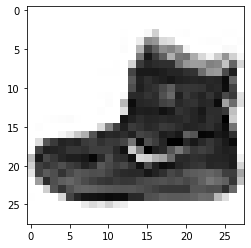

In [8]:
plt.imshow(X_train[0],cmap='Greys')

Check class labels

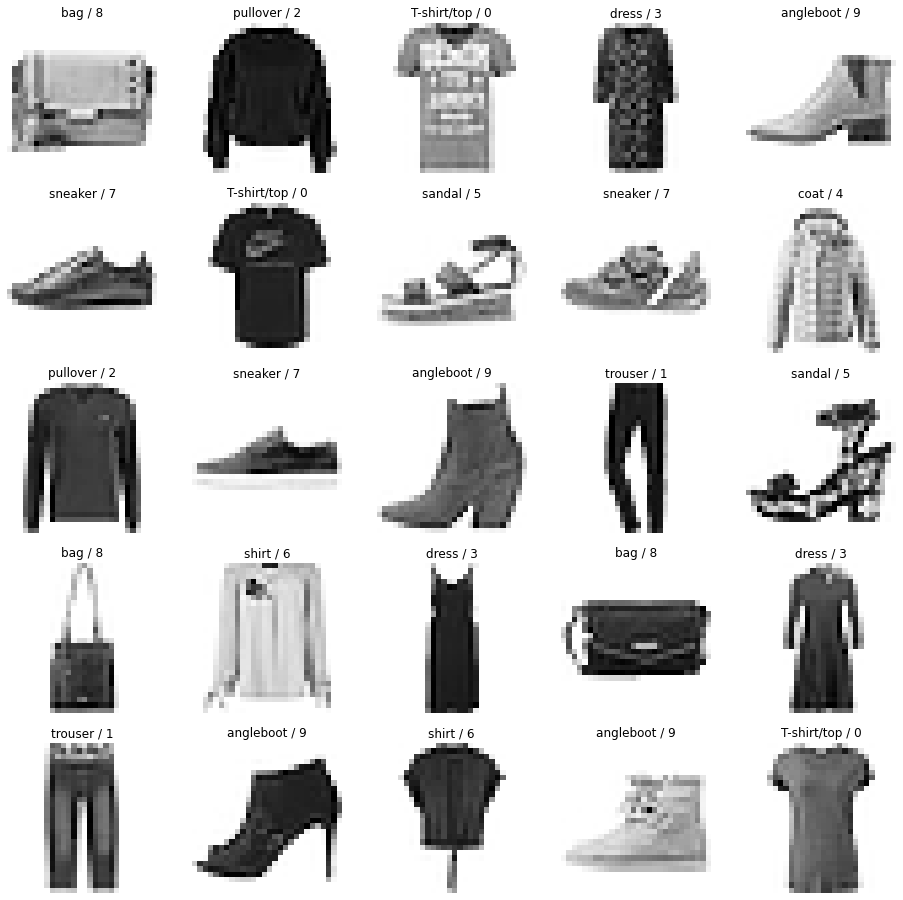

In [9]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000 , 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis("off")
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train.ndim

3

In [12]:
X_train = np.expand_dims(X_train , -1)
X_test =np.expand_dims(X_test , -1)

In [13]:
X_train.ndim

4

In [14]:
X_train.shape

(60000, 28, 28, 1)

In [15]:
X_train = X_train/255
X_test = X_test/255

X_train[0]

Train And Test The Model

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train , X_validation , y_train , y_validation = train_test_split(X_train ,y_train ,test_size= 0.2 , random_state =42)

In [19]:
X_train.shape , X_validation.shape , y_train.shape , y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

In [22]:
cnn_model = keras.models.Sequential([
                                     keras.layers.Conv2D(filters= 32 , kernel_size= 3,strides=(1,1),padding='valid',activation='relu', input_shape = [28,28,1]),
                                     keras.layers.MaxPool2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters= 64 , kernel_size= 3,strides=(2,2),padding='same',activation='relu'),
                                     keras.layers.MaxPool2D(pool_size=(2,2)),
                                     keras.layers.Flatten(),
                                     keras.layers.Dense(units= 128 , activation='relu'),
                                     keras.layers.Dropout(0.25),
                                     keras.layers.Dense(units= 256 , activation='relu'),
                                     keras.layers.Dropout(0.25),
                                     keras.layers.Dense(units= 128 , activation='relu'),
                                     keras.layers.Dense(units= 10 , activation='softmax'),

])

In [24]:
cnn_model.compile(optimizer= 'adam', loss ='sparse_categorical_crossentropy',metrics= ['accuracy'])

In [25]:
cnn_model.fit(X_train , y_train, epochs = 20 , batch_size= 512 , verbose= 1 , validation_data=(X_validation ,y_validation))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 171us/step - loss: 1.0284 - accuracy: 0.6170 - val_loss: 0.5703 - val_accuracy: 0.7764
Epoch 2/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.5431 - accuracy: 0.7952 - val_loss: 0.4516 - val_accuracy: 0.8331
Epoch 3/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.4500 - accuracy: 0.8337 - val_loss: 0.3896 - val_accuracy: 0.8524
Epoch 4/20
48000/48000 [==============================] - 1s 23us/step - loss: 0.3953 - accuracy: 0.8536 - val_loss: 0.3472 - val_accuracy: 0.8732
Epoch 5/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.3631 - accuracy: 0.8668 - val_loss: 0.3268 - val_accuracy: 0.8773
Epoch 6/20
48000/48000 [==============================] - 1s 22us/step - loss: 0.3383 - accuracy: 0.8750 - val_loss: 0.3186 - val_accuracy: 0.8815
Epoch 7/20
48000/48000 [==============================] - 1s 24us/s

Predict The Object

In [27]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.14, 0.  , 0.  ]], dtype=float32)

In [28]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [29]:
cnn_model.evaluate(X_test , y_test)

10000/10000 [==============================] - 1s 61us/step


[0.2656024631261826, 0.9031999707221985]

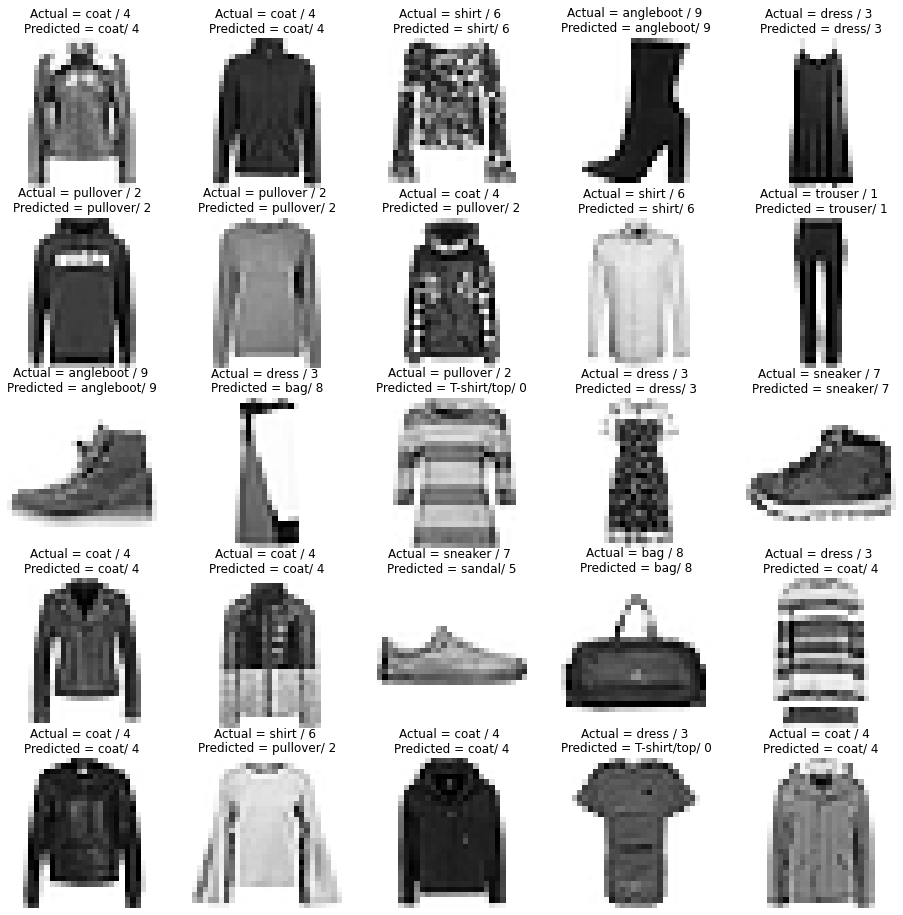

In [35]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000 , 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap='Greys')
  plt.axis("off")
  plt.title('Actual = {} / {} \nPredicted = {}/ {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))

In [37]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_predict_labels = [np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test , y_predict_labels)

<Figure size 1152x648 with 0 Axes>

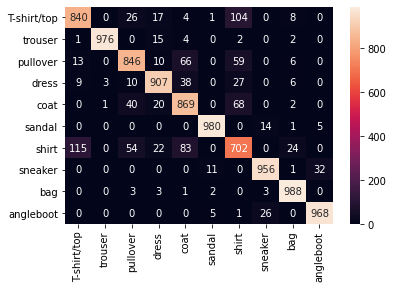

In [38]:
sns.heatmap(cm , annot=True ,fmt='d',xticklabels=class_labels,yticklabels=class_labels)

In [39]:
from sklearn.metrics import classification_report
cr = classification_report(y_test , y_predict_labels,target_names=class_labels)

In [40]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.84      0.85      1000
     trouser       1.00      0.98      0.99      1000
    pullover       0.86      0.85      0.85      1000
       dress       0.91      0.91      0.91      1000
        coat       0.82      0.87      0.84      1000
      sandal       0.98      0.98      0.98      1000
       shirt       0.73      0.70      0.72      1000
     sneaker       0.96      0.96      0.96      1000
         bag       0.95      0.99      0.97      1000
   angleboot       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Save The Model

In [41]:
cnn_model.save('fashion_mnist_cnn_model.h5')

In [42]:
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_cnn_model.h5')

In [45]:
y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

In [46]:
y_pred_sample

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [47]:
np.argmax(y_pred_sample[0])

9

In [48]:
y_test[0]

9